LOAD BEST MODEL THEN RETRAIN

New model: different classes "DESSERTSS"

WHY E?... GTW

Point of this notebook ipynb apala:
take best model 75/66/76, adjust layers, fine tune, get 80+++ :emot api:

In [1]:
#NOTES AT THE BOTTOM

In [ ]:
from google.colab import files

# Upload kaggle.json file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"druppm","key":"e2cca2368fd9dd82b1849aa7edcc26ec"}'}

In [ ]:
# Install Kaggle API
!pip install -q kaggle

# Create the .kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the food101 dataset
!kaggle datasets download -d kmader/food41

# Unzip the dataset
!unzip food41.zip -d dataset

#+- 3-6 min runtime

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/tacos/1026681.jpg  
  inflating: dataset/images/tacos/1030289.jpg  
  inflating: dataset/images/tacos/1033196.jpg  
  inflating: dataset/images/tacos/1036030.jpg  
  inflating: dataset/images/tacos/1042175.jpg  
  inflating: dataset/images/tacos/1044043.jpg  
  inflating: dataset/images/tacos/1058697.jpg  
  inflating: dataset/images/tacos/1059239.jpg  
  inflating: dataset/images/tacos/1059326.jpg  
  inflating: dataset/images/tacos/1066762.jpg  
  inflating: dataset/images/tacos/1070967.jpg  
  inflating: dataset/images/tacos/1073468.jpg  
  inflating: dataset/images/tacos/1075296.jpg  
  inflating: dataset/images/tacos/1085243.jpg  
  inflating: dataset/images/tacos/108529.jpg  
  inflating: dataset/images/tacos/1086014.jpg  
  inflating: dataset/images/tacos/108945.jpg  
  inflating: dataset/images/tacos/1089575.jpg  
  inflating: dataset/images/tacos/1091159.jpg  
  inflating: dataset/images/tacos/11013

In [ ]:
!ls dataset/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

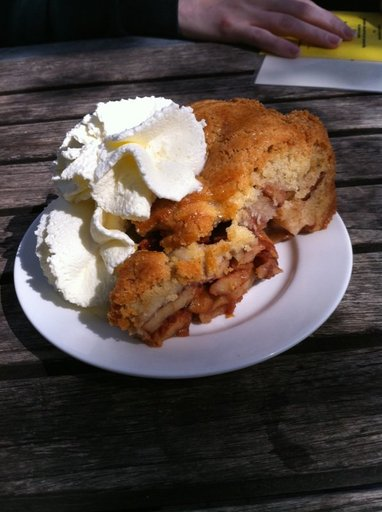

In [ ]:
#test images

import cv2
from google.colab.patches import cv2_imshow # Import the alternative function


imagesss = cv2.imread('dataset/images/apple_pie/103801.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow

In [ ]:
import os
import shutil
import os
import shutil

def organize_dataset(file_path, images_path, output_dir, selected_classes):
    """
    Organize dataset by copying only specific classes (folders) and their images
    as listed in file_path and defined in selected_classes.

    Args:
        file_path (str): Path to .txt file containing image paths.
        images_path (str): Base path to source image directory.
        output_dir (str): Path to output directory for reorganized dataset.
        selected_classes (list): List of class names to copy.
    """
    # Create a set of selected classes for faster lookup
    selected_classes_set = set(selected_classes)

    # Read all lines from the txt file
    with open(file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        # Split the line into class name (folder name) and image file name
        class_name, img_file = line.strip().split('/')

        # Skip classes that are not in the selected_classes
        if class_name not in selected_classes_set:
            continue

        # Build full source and target paths
        source_path = os.path.join(images_path, class_name, img_file + '.jpg')
        target_dir = os.path.join(output_dir, class_name)

        # Skip if the image file doesn't exist
        if not os.path.exists(source_path):
            continue

        # Ensure the target directory for the class exists
        os.makedirs(target_dir, exist_ok=True)

        # Copy the image to the target directory
        shutil.copy(source_path, target_dir)

# Example: Specify the dessert classes you want to use
dessert_classes = [
    'churros', 'ice_cream', 'macarons', 'donuts', 'chocolate_cake',
    'cup_cakes', 'red_velvet_cake', 'baklava', 'beignets', 'waffles'
]

# Restructure training and testing datasets
images_path1 = 'dataset/images'
train_file1 = 'dataset/meta/meta/train.txt'
test_file1 = 'dataset/meta/meta/test.txt'

organize_dataset(train_file1, images_path1, 'dataset/train', dessert_classes)  # Organize train set
organize_dataset(test_file1, images_path1, 'dataset/test', dessert_classes)   # Organize test set


In [ ]:
#count folders
import os

def count_folders(directory):
    """
    Counts the number of folders inside the given directory.

    Args:
        directory (str): Path to the directory.

    Returns:
        int: Number of folders inside the directory.
    """
    return len([d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))])

# Example usage
folder_count = count_folders('dataset/train')
print(f"Number of folders in 'dataset/train': {folder_count}")
folder_count1 = count_folders('dataset/test')
print(f"Number of folders in 'dataset/test': {folder_count1}")

#count files
import os

def count_files(directory):
    """
    Counts the number of files inside the given directory.

    Args:
        directory (str): Path to the folder.

    Returns:
        int: Number of files inside the folder.
    """
    return len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])

# Example usage
image_count = count_files('dataset/train/ice_cream')
print(f"Number of images in 'dataset/train/ice_cream': {image_count}")
image_count1 = count_files('dataset/test/churros')
print(f"Number of images in 'dataset/test/churros': {image_count1}")


Number of folders in 'dataset/train': 10
Number of folders in 'dataset/test': 10
Number of images in 'dataset/train/ice_cream': 750
Number of images in 'dataset/test/churros': 250


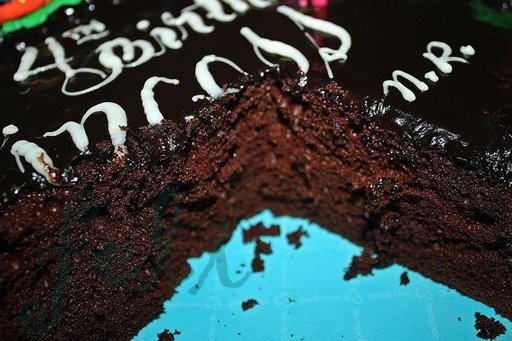

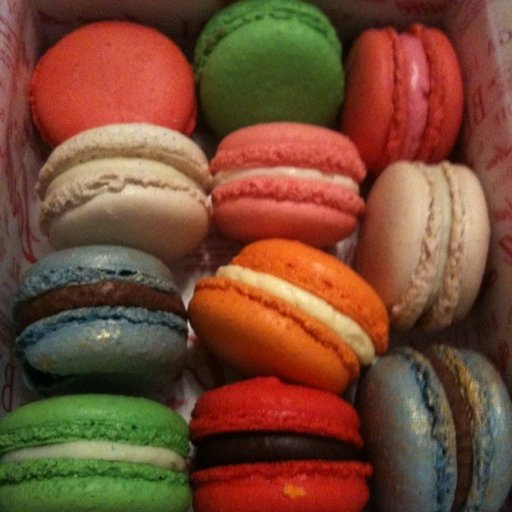

In [ ]:
imagesss = cv2.imread('/content/dataset/train/chocolate_cake/1009391.jpg')
cv2_imshow(imagesss) # Use cv2_imshow instead of cv2.imshow
imagesss = cv2.imread('/content/dataset/test/macarons/1027269.jpg')
cv2_imshow(imagesss)

In [ ]:
'''
np.save('classes.npy', lb.classes_)  # Save the class names to a file

in app:
import numpy as np
class_names = np.load('classes.npy')

import numpy as np

# Example output from the model
prediction = model.predict(image)
class_index = np.argmax(prediction)  # Get the index of the predicted class
class_name = class_names[class_index]  # Map index back to class name

print(f"Predicted label: {class_name}")


'''

In [ ]:
'''from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense
from keras import backend as K
from tensorflow.keras.regularizers import l2'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, Activation, BatchNormalization,
                                     MaxPooling2D, Dropout, GlobalAveragePooling2D,
                                     Dense, Flatten)
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model


model_old = load_model("x3food_model (72 66 77).h5")

In [ ]:
model_old.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,473,484 (39.95 MB)

 Trainable params: 10,471,370 (39.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
model = Sequential()
chanDim = -1

#add 1-4
for layer in model_old.layers[:-12]:
    model.add(layer)

model.add(Conv2D(192, (3, 3), padding="same", input_shape=(28, 28, 192), name="conv2d_7"))
model.add(Activation("relu", name="activation_8"))
model.add(BatchNormalization(axis=chanDim, name="batch_normalization_8"))

model.add(model_old.layers[-12])
model.add(model_old.layers[-11])
model.add(model_old.layers[-10])
model.add(model_old.layers[-9])
model.add(model_old.layers[-8])
model.add(model_old.layers[-7])
model.add(model_old.layers[-6])
model.add(model_old.layers[-5])
model.add(model_old.layers[-4])

model.add(Dropout(0.3, name="dropout_5"))

model.add(model_old.layers[-2])
model.add(model_old.layers[-1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,473,482 (39.95 MB)

 Trainable params: 10,471,370 (39.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

In [ ]:
'''
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


'''

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.5, 1.5],
    shear_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2  # Reserve 20% for validation
)

# Rescaling for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Training generator (80% of training data)
train_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset="training"  # Training subset
)

# Validation generator (20% of training data)
validation_generator = train_datagen.flow_from_directory(
    directory='dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
    subset="validation"  # Validation subset
)

# Test generator remains unchanged
test_generator = test_datagen.flow_from_directory(
    directory='dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,  # Ensure validation order is consistent
)


print(f"Class indices train: {train_generator.class_indices}")  # Display folder-to-label mapping
print(f"Class indices test: {test_generator.class_indices}")  # Display folder-to-label mapping



Found 6000 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Class indices train: {'baklava': 0, 'beignets': 1, 'chocolate_cake': 2, 'churros': 3, 'cup_cakes': 4, 'donuts': 5, 'ice_cream': 6, 'macarons': 7, 'red_velvet_cake': 8, 'waffles': 9}
Class indices test: {'baklava': 0, 'beignets': 1, 'chocolate_cake': 2, 'churros': 3, 'cup_cakes': 4, 'donuts': 5, 'ice_cream': 6, 'macarons': 7, 'red_velvet_cake': 8, 'waffles': 9}


In [ ]:
#for train datagen using weights

sample_weights_dict = {
    'baklava': 1.0,
    'beignets': 1.0,
    'chocolate_cake': 1.0,
    'churros': 1.0,
    'cup_cakes': 1.4,  # Cupcakes need more attention
    'donuts': 1.5,     # Donuts require stronger recognition
    'ice_cream': 1.6,  # Ice Cream has lowest recall, needs highest weight
    'macarons': 1.0,
    'red_velvet_cake': 1.0,
    'waffles': 1.0
}

class_weights = {
    train_generator.class_indices[class_name]: weight
    for class_name, weight in sample_weights_dict.items()
}

In [ ]:
print("Class Weights Applied:")
for class_index, weight in class_weights.items():
    class_name = list(train_generator.class_indices.keys())[class_index]
    print(f"{class_name} (Index {class_index}): {weight}")


Class Weights Applied:
baklava (Index 0): 1.0
beignets (Index 1): 1.0
chocolate_cake (Index 2): 1.0
churros (Index 3): 1.0
cup_cakes (Index 4): 1.4
donuts (Index 5): 1.5
ice_cream (Index 6): 1.6
macarons (Index 7): 1.0
red_velvet_cake (Index 8): 1.0
waffles (Index 9): 1.0


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Learning rate scheduler
'''def lr_schedule(epoch, lr):
    return lr * 0.95 if epoch > 5 else lr
'''

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Metric to monitor (e.g., validation loss)
    factor=0.5,               # Reduce learning rate by this factor
    patience=5,               # Wait for 3 epochs with no improvement
    verbose=1,                # Prints updates
    min_lr=1e-6               # Minimum learning rate to prevent it from becoming too small
)

# Build and compile the model
# model = FoodModel.build(width=224, height=224, depth=3, classes=10)  # Adjust classes for 10-class testing
#opt = Adam(learning_rate=1e-3)
#opt = Adam(learning_rate=2e-4)
#opt = Adam(learning_rate=1e-5)
opt = Adam(learning_rate=1e-4)
#opt = Adam(learning_rate=5e-6)


model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Callbacks
checkpoint = ModelCheckpoint('food_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#callbacks = [checkpoint, LearningRateScheduler(lr_schedule), early_stopping]
callbacks = [checkpoint, early_stopping, reduce_lr]

# Train the model
H = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    epochs=40,
    callbacks=callbacks,
    class_weight=class_weights
)

print("Model training complete and saved as 'food_model.h5'.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.3729 - loss: 2.8489

188/188 ━━━━━━━━━━━━━━━━━━━━ 160s 722ms/step - accuracy: 0.3735 - loss: 2.8461 - val_accuracy: 0.4920 - val_loss: 2.0353 - learning_rate: 1.0000e-04
Epoch 2/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.6337 - loss: 1.8685

188/188 ━━━━━━━━━━━━━━━━━━━━ 164s 620ms/step - accuracy: 0.6336 - loss: 1.8686 - val_accuracy: 0.5813 - val_loss: 1.9676 - learning_rate: 1.0000e-04
Epoch 3/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 611ms/step - accuracy: 0.6410 - loss: 1.8581 - val_accuracy: 0.5347 - val_loss: 2.2964 - learning_rate: 1.0000e-04
Epoch 4/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.6569 - loss: 1.8418

188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 614ms/step - accuracy: 0.6568 - loss: 1.8418 - val_accuracy: 0.6093 - val_loss: 1.9354 - learning_rate: 1.0000e-04
Epoch 5/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 610ms/step - accuracy: 0.6668 - loss: 1.8245 - val_accuracy: 0.5593 - val_loss: 2.1493 - learning_rate: 1.0000e-04
Epoch 6/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 610ms/step - accuracy: 0.6702 - loss: 1.8203 - val_accuracy: 0.6160 - val_loss: 1.9617 - learning_rate: 1.0000e-04
Epoch 7/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 604ms/step - accuracy: 0.6729 - loss: 1.8762 - val_accuracy: 0.6027 - val_loss: 1.9892 - learning_rate: 1.0000e-04
Epoch 8/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 610ms/step - accuracy: 0.6724 - loss: 1.8331 - val_accuracy: 0.6060 - val_loss: 1.9506 - learning_rate: 1.0000e-04
Epoch 9/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step - accuracy: 0.6914 - loss: 1.8034
Epoch 9: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 115s 609ms/step - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 617ms/step - accuracy: 0.6920 - loss: 1.7978 - val_accuracy: 0.6327 - val_loss: 1.8356 - learning_rate: 5.0000e-05
Epoch 11/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.7037 - loss: 1.7158

188/188 ━━━━━━━━━━━━━━━━━━━━ 117s 623ms/step - accuracy: 0.7037 - loss: 1.7157 - val_accuracy: 0.6353 - val_loss: 1.7991 - learning_rate: 5.0000e-05
Epoch 12/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 118s 626ms/step - accuracy: 0.7058 - loss: 1.6518 - val_accuracy: 0.6380 - val_loss: 1.8076 - learning_rate: 5.0000e-05
Epoch 13/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 611ms/step - accuracy: 0.7198 - loss: 1.6082 - val_accuracy: 0.6007 - val_loss: 1.9599 - learning_rate: 5.0000e-05
Epoch 14/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.7100 - loss: 1.5883

188/188 ━━━━━━━━━━━━━━━━━━━━ 116s 616ms/step - accuracy: 0.7100 - loss: 1.5884 - val_accuracy: 0.6540 - val_loss: 1.6985 - learning_rate: 5.0000e-05
Epoch 15/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 603ms/step - accuracy: 0.7031 - loss: 1.6042 - val_accuracy: 0.6233 - val_loss: 1.8419 - learning_rate: 5.0000e-05
Epoch 16/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 602ms/step - accuracy: 0.7039 - loss: 1.6011 - val_accuracy: 0.6513 - val_loss: 1.7193 - learning_rate: 5.0000e-05
Epoch 17/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 606ms/step - accuracy: 0.7112 - loss: 1.5773 - val_accuracy: 0.6207 - val_loss: 1.8821 - learning_rate: 5.0000e-05
Epoch 18/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 602ms/step - accuracy: 0.7114 - loss: 1.5768 - val_accuracy: 0.6360 - val_loss: 1.7860 - learning_rate: 5.0000e-05
Epoch 19/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.7212 - loss: 1.5224
Epoch 19: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 607ms/s

188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 604ms/step - accuracy: 0.7146 - loss: 1.5243 - val_accuracy: 0.6453 - val_loss: 1.6538 - learning_rate: 2.5000e-05
Epoch 21/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 602ms/step - accuracy: 0.7322 - loss: 1.4524 - val_accuracy: 0.6480 - val_loss: 1.6721 - learning_rate: 2.5000e-05
Epoch 22/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.7343 - loss: 1.4366

188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 603ms/step - accuracy: 0.7342 - loss: 1.4366 - val_accuracy: 0.6607 - val_loss: 1.6149 - learning_rate: 2.5000e-05
Epoch 23/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 604ms/step - accuracy: 0.7382 - loss: 1.4195 - val_accuracy: 0.6513 - val_loss: 1.6278 - learning_rate: 2.5000e-05
Epoch 24/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 597ms/step - accuracy: 0.7495 - loss: 1.3870 - val_accuracy: 0.6193 - val_loss: 1.8332 - learning_rate: 2.5000e-05
Epoch 25/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.7283 - loss: 1.3975

188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 602ms/step - accuracy: 0.7284 - loss: 1.3975 - val_accuracy: 0.6633 - val_loss: 1.5944 - learning_rate: 2.5000e-05
Epoch 26/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 600ms/step - accuracy: 0.7370 - loss: 1.3743 - val_accuracy: 0.6500 - val_loss: 1.6414 - learning_rate: 2.5000e-05
Epoch 27/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 597ms/step - accuracy: 0.7461 - loss: 1.3410 - val_accuracy: 0.6320 - val_loss: 1.7215 - learning_rate: 2.5000e-05
Epoch 28/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7372 - loss: 1.3574

188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 605ms/step - accuracy: 0.7372 - loss: 1.3574 - val_accuracy: 0.6580 - val_loss: 1.5553 - learning_rate: 2.5000e-05
Epoch 29/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.7465 - loss: 1.3529

188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 599ms/step - accuracy: 0.7465 - loss: 1.3528 - val_accuracy: 0.6660 - val_loss: 1.5372 - learning_rate: 2.5000e-05
Epoch 30/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 599ms/step - accuracy: 0.7321 - loss: 1.3304 - val_accuracy: 0.6400 - val_loss: 1.6029 - learning_rate: 2.5000e-05
Epoch 31/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 112s 597ms/step - accuracy: 0.7356 - loss: 1.3235 - val_accuracy: 0.6267 - val_loss: 1.7499 - learning_rate: 2.5000e-05
Epoch 32/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 595ms/step - accuracy: 0.7450 - loss: 1.3046 - val_accuracy: 0.6620 - val_loss: 1.5592 - learning_rate: 2.5000e-05
Epoch 33/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 113s 601ms/step - accuracy: 0.7557 - loss: 1.2783 - val_accuracy: 0.6493 - val_loss: 1.5715 - learning_rate: 2.5000e-05
Epoch 34/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7427 - loss: 1.2939
Epoch 34: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 604ms/s

188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 610ms/step - accuracy: 0.7267 - loss: 1.3250 - val_accuracy: 0.6527 - val_loss: 1.5332 - learning_rate: 1.2500e-05
Epoch 37/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7502 - loss: 1.2684

188/188 ━━━━━━━━━━━━━━━━━━━━ 114s 607ms/step - accuracy: 0.7502 - loss: 1.2683 - val_accuracy: 0.6693 - val_loss: 1.4796 - learning_rate: 1.2500e-05
Epoch 38/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 603ms/step - accuracy: 0.7573 - loss: 1.2352 - val_accuracy: 0.6680 - val_loss: 1.5359 - learning_rate: 1.2500e-05
Epoch 39/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 603ms/step - accuracy: 0.7749 - loss: 1.1892 - val_accuracy: 0.6553 - val_loss: 1.5461 - learning_rate: 1.2500e-05
Epoch 40/40
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 605ms/step - accuracy: 0.7512 - loss: 1.2377 - val_accuracy: 0.6520 - val_loss: 1.5179 - learning_rate: 1.2500e-05
Model training complete and saved as 'food_model.h5'.


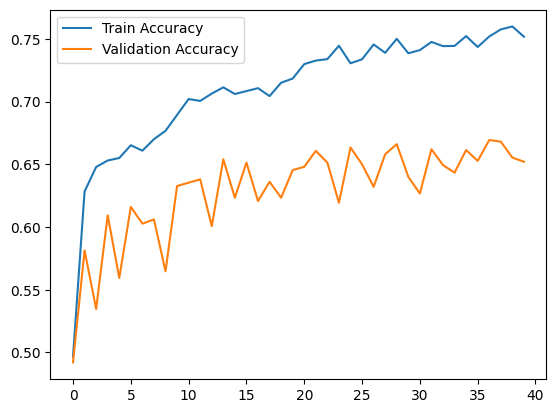

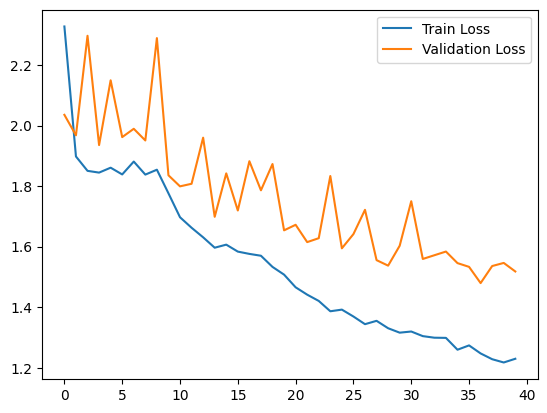

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(H.history['accuracy'], label='Train Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(H.history['loss'], label='Train Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [ ]:
# Save label mapping
import numpy as np


np.save('classes.npy', train_generator.class_indices)
print("Class indices saved.")

# Save training history
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(H.history, f)


Class indices saved.


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import random
import pickle

In [ ]:
#Load the Saved Model
model = load_model("food_model.h5")  # Path to your saved model

#Load the Classes File (classes.npy)
class_indices = np.load("classes.npy", allow_pickle=True).item()  # Load class-to-index mapping
idx_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping for class names

#Load the Training History File (traininghistory.pkl)
with open("training_history.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
#Result of the Training

# Display the final training and validation accuracy
final_training_accuracy = history['accuracy'][-4]
final_validation_accuracy = history['val_accuracy'][-4]
print(f"Final Training Accuracy: {final_training_accuracy:.2f}")
print(f"Final Validation Accuracy: {final_validation_accuracy:.2f}")


Final Training Accuracy: 0.75
Final Validation Accuracy: 0.67


In [ ]:
#Evaluate the Model on the Entire Test Dataset

test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {test_loss:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.8020 - loss: 1.0589
Test Loss: 1.15
Test Accuracy: 0.78


In [ ]:
#Make Predictions on the Entire Test Dataset

predictions = model.predict(test_generator, steps=len(test_generator))  # Predict probabilities for all test images
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices
true_classes = test_generator.classes  # Get true labels from the generator

# Display the overall prediction accuracy
overall_accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Prediction Accuracy (Test Dataset): {overall_accuracy:.2f}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step
Prediction Accuracy (Test Dataset): 0.78


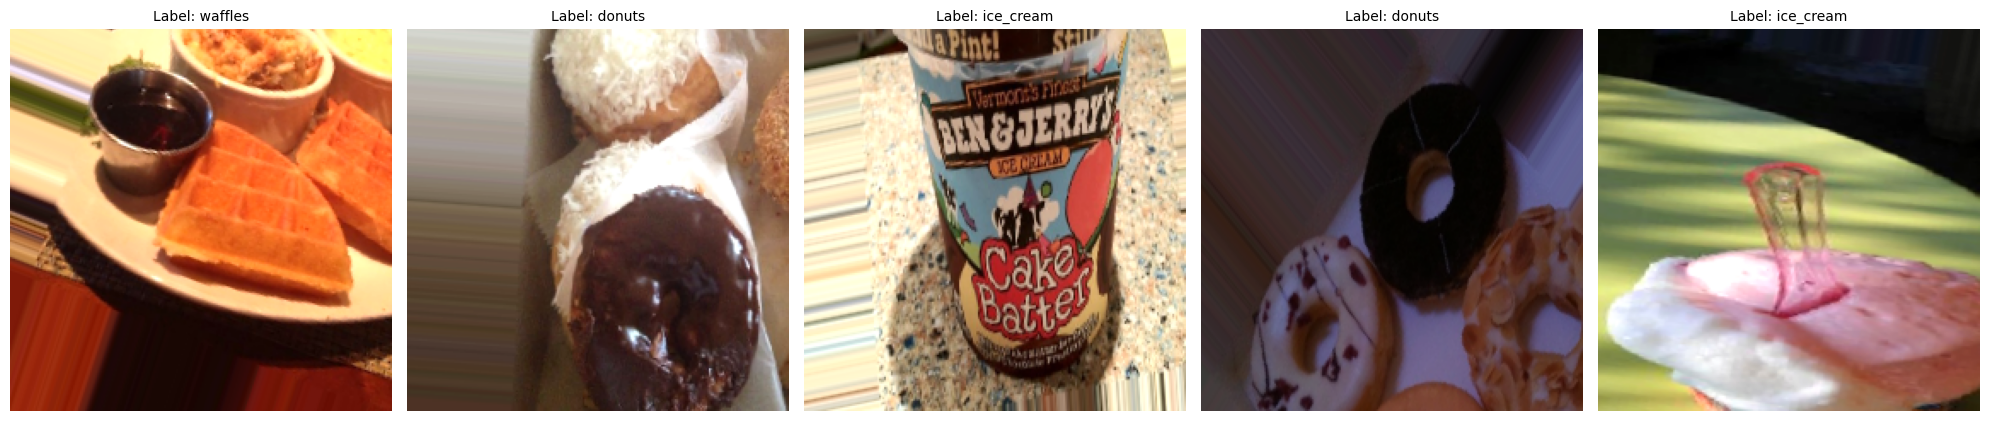

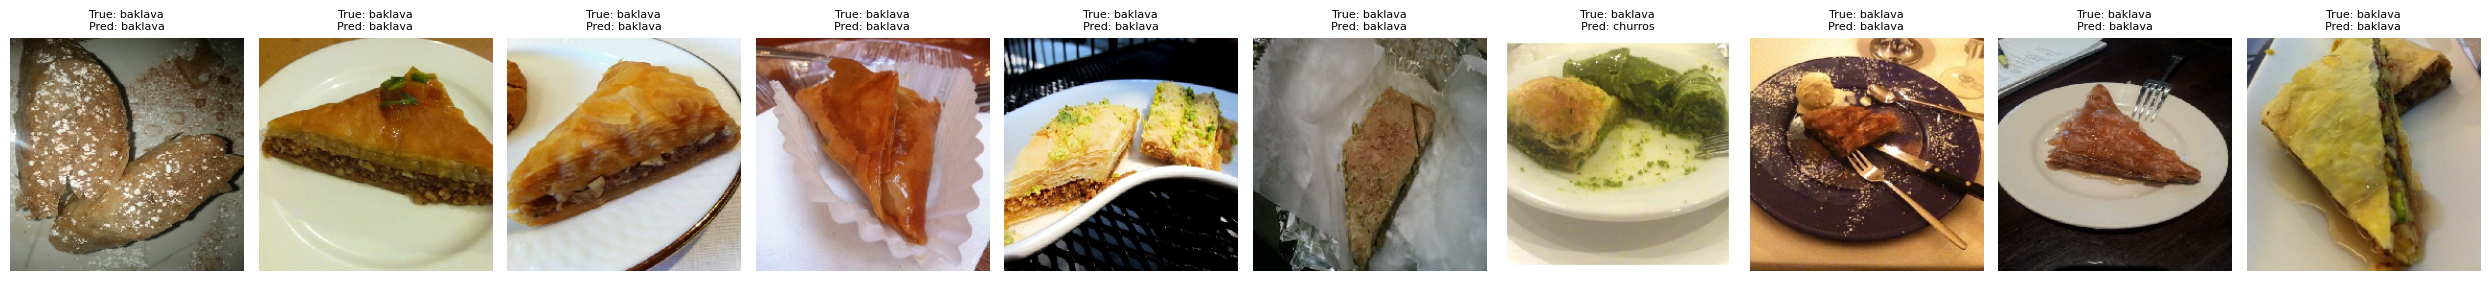

In [ ]:
#train
train_images, train_labels = next(train_generator)  # Fetch one batch of training data

# Select 5 random indices
random_train_indices = random.sample(range(len(train_images)), 5)

# Plot 5 training images with their true labels
fig, axes = plt.subplots(ncols=5, figsize=(20, 5))
for i, idx in enumerate(random_train_indices):
    axes[i].imshow(train_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(train_labels[idx])]  # Get the true class name
    axes[i].set_title(f"Label: {true_label}", fontsize=10)  # Show the true label
    axes[i].axis("off")  # Turn off axis ticks for better visualization
plt.tight_layout()
plt.show()

#test
# Get a batch of test images and their true labels
test_images, test_labels = next(test_generator)  # Fetch one batch of test data

# Select 10 random indices
random_indices = random.sample(range(len(test_images)), 10)

# Plot 10 test images with their true and predicted labels
fig, axes = plt.subplots(ncols=10, figsize=(25, 5))
for i, idx in enumerate(random_indices):
    axes[i].imshow(test_images[idx])  # Display the image
    true_label = idx_to_class[np.argmax(test_labels[idx])]  # Get the true class name
    #predicted_label = idx_to_class[np.argmax(predictions[idx])]  # Get the predicted class name
    predicted_label = idx_to_class[predicted_classes[idx]]  # Get the predicted class name
    axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}", fontsize=8)
    axes[i].axis("off")
plt.tight_layout()
plt.show()

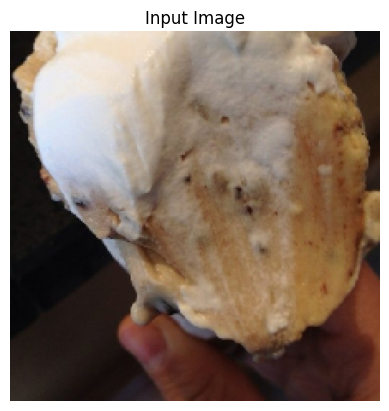

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: ice_cream


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load and preprocess a single image from a specified path
def predict_single_image(model, image_path, class_mapping):
    # Step 1: Load the image
    img = load_img(image_path, target_size=(224, 224))  # Resize to model's input size
    plt.imshow(img)  # Display the image
    plt.axis("off")
    plt.title("Input Image")
    plt.show()

    # Step 2: Convert the image to an array
    img_array = img_to_array(img)  # Convert to NumPy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize the pixel values to [0, 1]

    # Step 3: Make a prediction
    predictions = model.predict(img_array)  # Get prediction probabilities
    predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability
    predicted_class_name = class_mapping[predicted_class_index]  # Map index to class name

    # Step 4: Display the prediction
    print(f"Predicted Class: {predicted_class_name}")
    return predicted_class_name

# Example usage
image_path = "/content/dataset/test/ice_cream/1569983.jpg"  # Replace with the path to your image
#image_path = "/content/42361.jpg"  # Replace with the path to your image

predicted_label = predict_single_image(model, image_path, idx_to_class)


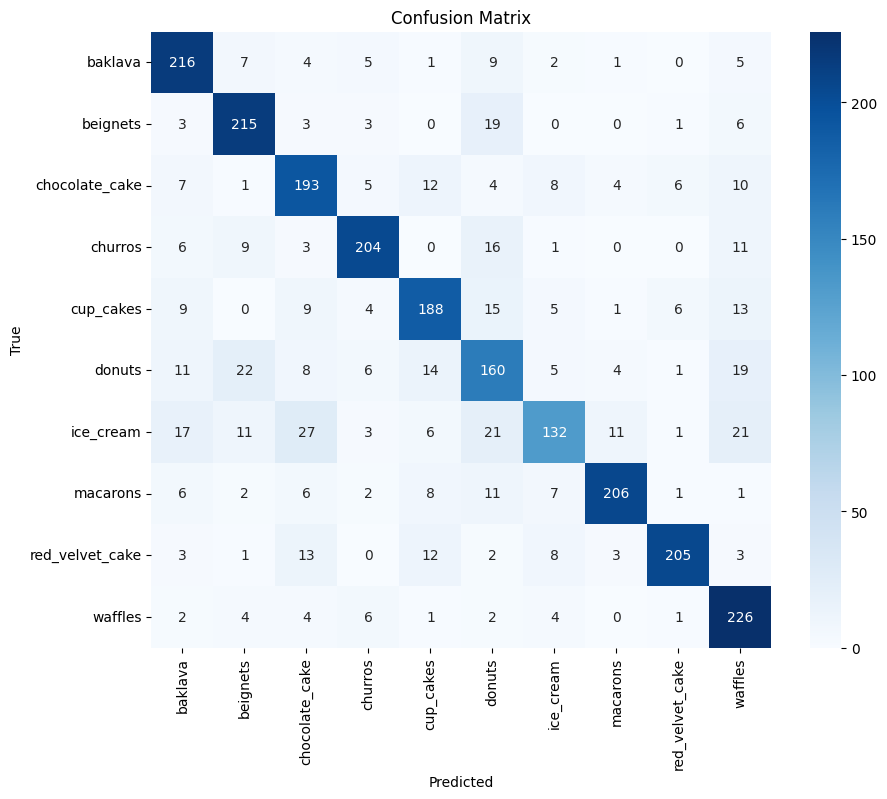

In [ ]:
#Generate and Plot Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)  # Create confusion matrix

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_indices.keys(), yticklabels=class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_indices.keys()))


Classification Report:
                 precision    recall  f1-score   support

        baklava       0.77      0.86      0.82       250
       beignets       0.79      0.86      0.82       250
 chocolate_cake       0.71      0.77      0.74       250
        churros       0.86      0.82      0.84       250
      cup_cakes       0.78      0.75      0.76       250
         donuts       0.62      0.64      0.63       250
      ice_cream       0.77      0.53      0.63       250
       macarons       0.90      0.82      0.86       250
red_velvet_cake       0.92      0.82      0.87       250
        waffles       0.72      0.90      0.80       250

       accuracy                           0.78      2500
      macro avg       0.78      0.78      0.78      2500
   weighted avg       0.78      0.78      0.78      2500



# **NOTE**

In [ ]:
#Original architecture and result on different 10 class food dataset
'''
model:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.25))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.6))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

reduceonplateu patience 5, initial: 2e-4

Final Training Accuracy: 0.64
Final Validation Accuracy: 0.61
Prediction Accuracy (Test Dataset): 0.64

Classification Report:
                   precision    recall  f1-score   support

        apple_pie       0.51      0.26      0.34       250
   baby_back_ribs       0.66      0.81      0.73       250
          baklava       0.49      0.72      0.58       250
   beef_carpaccio       0.85      0.71      0.77       250
     beef_tartare       0.66      0.70      0.68       250
       beet_salad       0.87      0.67      0.76       250
         beignets       0.58      0.94      0.72       250
         bibimbap       0.75      0.85      0.80       250
    bread_pudding       0.50      0.48      0.49       250
breakfast_burrito       0.69      0.28      0.40       250

         accuracy                           0.64      2500
        macro avg       0.66      0.64      0.63      2500
     weighted avg       0.66      0.64      0.63      2500
'''

#after fine tuning that model, got to 70 66 72, took that model and fine tune on this 10 class dataset (dessert)
'''
20 epoch, 2e-4, reduceonplateu patience 3 factor 0.5
63/60/66

Classification Report:
                 precision    recall  f1-score   support

        baklava       0.73      0.79      0.76       250
       beignets       0.67      0.83      0.74       250
 chocolate_cake       0.75      0.59      0.66       250
        churros       0.63      0.71      0.67       250
      cup_cakes       0.69      0.39      0.50       250
         donuts       0.49      0.58      0.53       250
      ice_cream       0.56      0.31      0.40       250
       macarons       0.71      0.72      0.71       250
red_velvet_cake       0.84      0.86      0.85       250
        waffles       0.59      0.85      0.70       250

       accuracy                           0.66      2500
      macro avg       0.67      0.66      0.65      2500
   weighted avg       0.67      0.66      0.65      2500
'''

#fine tune for many epochs with different lrs and strategies, added dropout, changed dropout value multiple times and got 75/66/76
#fine tuned abit more and got this file with some changes
'''
final architecture and values:
model:
class FoodModel:
    @staticmethod
    def build(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        chanDim = -1

        # Adjust channel dimension for "channels_first" mode
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        # First Conv block: Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(32, (5, 5), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Second Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(64, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.01)))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.4))

        # Third Conv block: Conv -> ReLU -> BN -> Conv -> ReLU -> BN -> Pool -> Dropout
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        # Fourth Conv block (optional for Food-101): Deeper network for fine-grained features
        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))

        model.add(Conv2D(192, (3, 3), padding="same", input_shape=(28, 28, 192), name="conv2d_7"))
        model.add(Activation("relu", name="activation_8"))
        model.add(BatchNormalization(axis=chanDim, name="batch_normalization_8"))

        model.add(Conv2D(192, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(BatchNormalization(axis=chanDim))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.6))

        # Fully connected (Dense) block
        model.add(Flatten())
        model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
        model.add(BatchNormalization())
        model.add(Dropout(0.6))
        model.add(Dropout(0.4))

        # Output layer: Classes -> softmax activation
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

result 75/67/78
'''

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 192)    │       221,376 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,473,484 (39.95 MB)

 Trainable params: 10,471,370 (39.95 MB)

 Non-trainable params: 2,112 (8.25 KB)

 Optimizer params: 2 (12.00 B)